In [22]:
from danial import dataloader, model


import matplotlib.pyplot as plt
import torch.nn.functional as F
import torch
from torchvision.transforms import GaussianBlur, Normalize, ToTensor


In [14]:
mod = model.Model()

/Users/dania/code/fyp/MHNet/vengeance/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/dania/code/fyp/MHNet/vengeance/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [15]:
print(mod)

Model(
  (backbone): VGGFeatureExtractor(
    (block1): Sequential(
      (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): ReLU(inplace=True)
      (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (3): ReLU(inplace=True)
      (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    )
    (block2): Sequential(
      (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (6): ReLU(inplace=True)
      (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (8): ReLU(inplace=True)
      (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    )
    (block3): Sequential(
      (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (11): ReLU(inplace=True)
      (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (13): ReLU(inplace=True)
      (14): Conv2d(256, 256, kernel_size=(3,

In [16]:
with torch.no_grad():
    binary_pred, boundary_pred, fused_feat = mod(test)

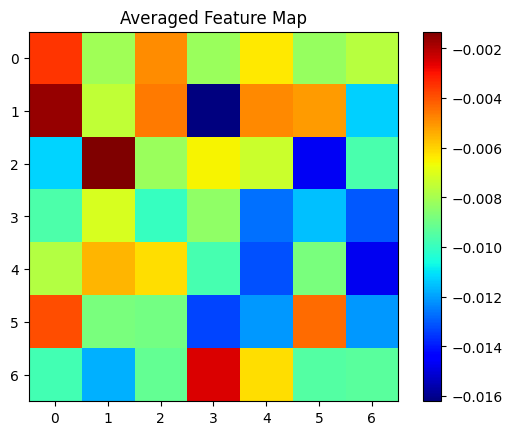

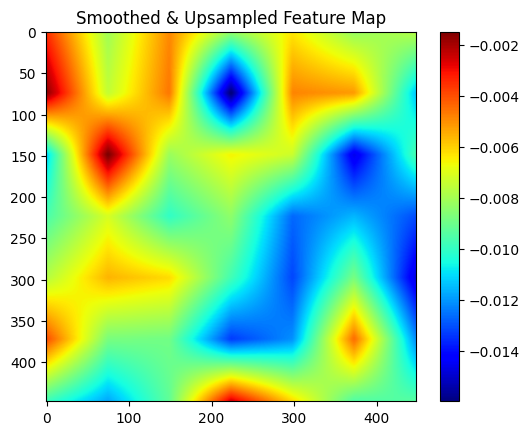

In [23]:
test = dataloader.load_image("assets/camo-sold-d.png", target_size = (224,224))
with torch.no_grad():
    binary_pred, boundary_pred, fused_feat = mod(test)

avg_map = fused_feat.mean(dim=1)  # [1, 7, 7]

plt.imshow(avg_map[0].detach().cpu(), cmap='jet')
plt.title("Averaged Feature Map")
plt.colorbar()
plt.show()

avg_map = fused_feat.mean(dim=1, keepdim=True)  # [1, 1, 7, 7]

# 1️⃣ Upsample to higher resolution (e.g., 224x224)
upsampled = F.interpolate(avg_map, size=(448,448), mode='bilinear', align_corners=True)

# 2️⃣ Apply Gaussian blur
blur = GaussianBlur(kernel_size=(7,7), sigma=(1.0,1.0))
smoothed = blur(upsampled)

# 3️⃣ Show result
plt.imshow(smoothed[0, 0].detach().cpu(), cmap='jet')  # using 'jet' for heatmap look
plt.title("Smoothed & Upsampled Feature Map")
plt.colorbar()
plt.show()
